http://catherineh.github.io/programming/2017/10/24/emoji-data-markers-in-matplotlib

In [1]:
import numpy as np
import pylab as plt
import pandas as pd
from matplotlib.cbook import get_sample_data
from os.path import join, dirname, abspath
from datetime import timedelta

In [2]:
data = pd.read_csv("./data.csv", delimiter=",", header=None)

In [3]:
data.columns=["datetime", "event"]

In [4]:
data

,datetime,event
0,"June 5, 2020 at 02:22PM",👩
1,"June 5, 2020 at 02:27PM",💩
2,"June 5, 2020 at 03:08PM",👩
3,"June 5, 2020 at 03:12PM",💩
4,"June 5, 2020 at 03:46PM",💩
...,...,...
82,"June 9, 2020 at 04:07AM",👩
83,"June 9, 2020 at 04:17AM",💩
84,"June 9, 2020 at 07:01AM",👩
85,"June 9, 2020 at 08:28AM",💩


In [5]:
datetime = pd.to_datetime(data['datetime'])
event = data["event"]

In [6]:
%matplotlib inline

In [7]:
poo_img = plt.imread("./pile-of-poo_1f4a9.png")

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data

def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
      
    # ax.autoscale()
    return artists

In [9]:
np.unique(event)

array(['🍼', '👩', '💦', '💩'], dtype=object)

In [10]:
figures = ['/home/kei/notebooks/baby_log/baby-bottle_1f37c.png',
           '/home/kei/notebooks/baby_log/woman_1f469.png',
           '/home/kei/notebooks/baby_log/sweat-droplets_1f4a6.png',
           '/home/kei/notebooks/baby_log/pile-of-poo_1f4a9.png']

In [11]:
data.index = datetime

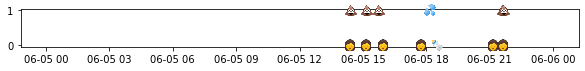

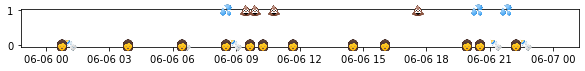

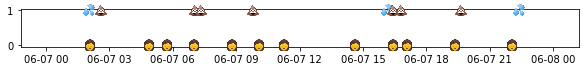

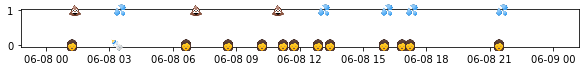

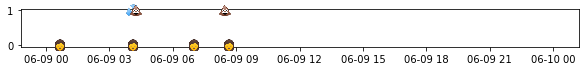

In [12]:
for day, each_day in data.groupby(data.index.day):
    fig = plt.figure(figsize=(10,0.7))
    ax = fig.add_subplot()
    
    for i, (e, image) in enumerate(zip(sorted(np.unique(event)), figures)):
        x = each_day.index[each_day.event==e]
        y = [i//2  for _ in x]
        image_path = get_sample_data(image)
        ax.plot(x, y, linewidth=0)

        ax.vlines(x.date, 0, 1, linewidth=0)
        ax.vlines(x.date + timedelta(days=1), 0, 1, linewidth=0)

        imscatter(x, y, image_path, zoom=0.1, ax=ax)
            
plt.show()